In [1]:
import os

import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import resample
from snn.resonator import create_excitatory_inhibitory_resonator

In [2]:
# load the sample data
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)
aud_epochs = epochs['auditory']
# view the data
# raw.plot()
None

Opening raw data file C:\Users\pariz\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 319 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  

In [3]:
print(raw.info)

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


In [4]:
eeg_ch_names = [ch_name for ch_name in aud_epochs.info['ch_names'] if ch_name.startswith('EEG')]
eeg_ch_names

['EEG 001',
 'EEG 002',
 'EEG 003',
 'EEG 004',
 'EEG 005',
 'EEG 006',
 'EEG 007',
 'EEG 008',
 'EEG 009',
 'EEG 010',
 'EEG 011',
 'EEG 012',
 'EEG 013',
 'EEG 014',
 'EEG 015',
 'EEG 016',
 'EEG 017',
 'EEG 018',
 'EEG 019',
 'EEG 020',
 'EEG 021',
 'EEG 022',
 'EEG 023',
 'EEG 024',
 'EEG 025',
 'EEG 026',
 'EEG 027',
 'EEG 028',
 'EEG 029',
 'EEG 030',
 'EEG 031',
 'EEG 032',
 'EEG 033',
 'EEG 034',
 'EEG 035',
 'EEG 036',
 'EEG 037',
 'EEG 038',
 'EEG 039',
 'EEG 040',
 'EEG 041',
 'EEG 042',
 'EEG 043',
 'EEG 044',
 'EEG 045',
 'EEG 046',
 'EEG 047',
 'EEG 048',
 'EEG 049',
 'EEG 050',
 'EEG 051',
 'EEG 052',
 'EEG 053',
 'EEG 054',
 'EEG 055',
 'EEG 056',
 'EEG 057',
 'EEG 058',
 'EEG 059',
 'EEG 060']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
No baseline correction applied


[Parallel(n_jobs=1)]: Done 364 out of 364 | elapsed:   11.6s finished


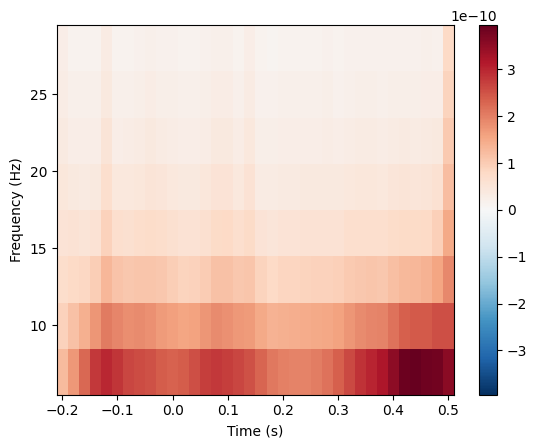

In [5]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3, use_fft=True)
res = power.plot(['EEG 051'])

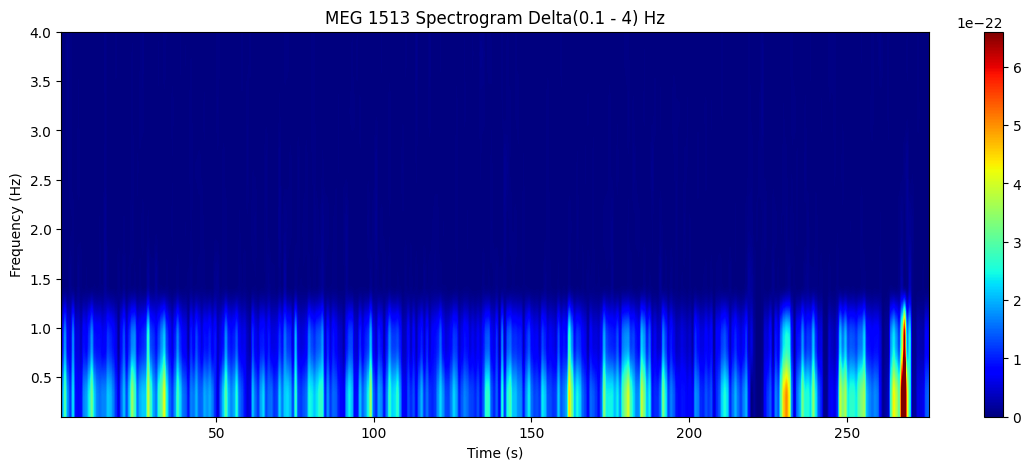

In [6]:
# extract a longer segment of data from a different channel
channel = 'MEG 1513'
data, times = raw[channel, :]
data = data[0]
fs = raw.info['sfreq']

def plot_spectogram(data, fs, fmin, fmax, channel_name, times=None):
    # plot the spectrogram
    plt.figure(figsize=(14, 5))
    Sxx, freqs, bins, im = plt.specgram(data, NFFT=256, Fs=fs,
                                         noverlap=128, cmap='jet')
    plt.ylim(fmin, fmax)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(channel + f' Spectrogram {channel_name}({fmin} - {fmax}) Hz')
    plt.imshow(Sxx, aspect='auto',
               cmap='jet', origin='lower',
               extent=[bins[0], bins[-1], freqs[0], freqs[-1]],
               vmin=0, vmax=np.max(Sxx[(freqs >= fmin) & (freqs <= fmax)]))
    plt.colorbar()
    plt.show()

plot_spectogram(data, fs, 0.1, 4, 'Delta')

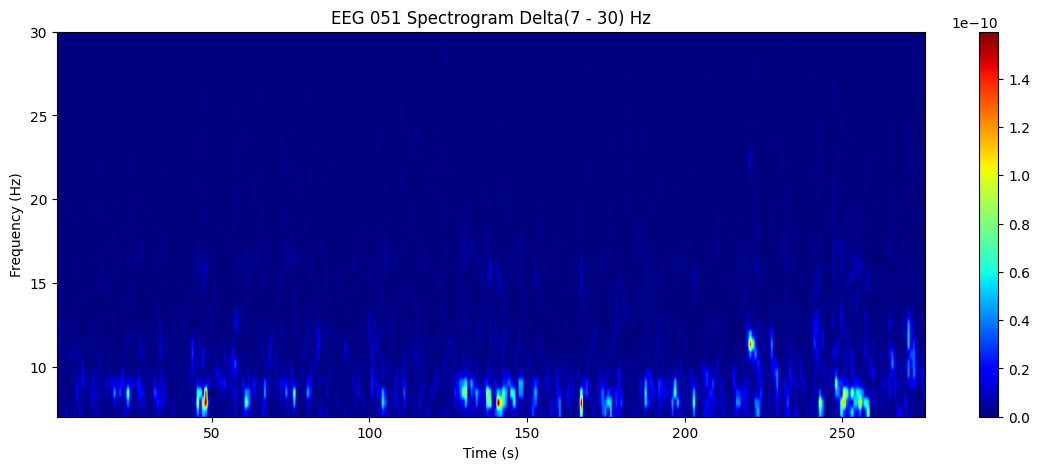

In [7]:
channel = 'EEG 051'
data, times = raw[channel, :]
data = data[0]
fs = raw.info['sfreq']

plot_spectogram(data, fs, 7, 30, 'Delta', times=times)

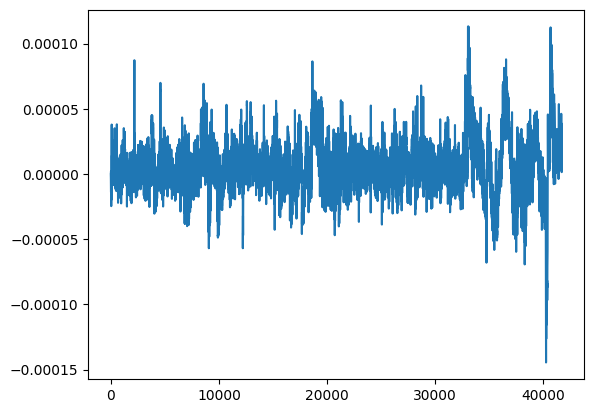

In [8]:
plt.plot(data)

In [3]:
from pathlib import Path


# number of samples in the original and resampled signals
def resample_signal(f_new, f_source, data):
    n_samples_orig = data.shape[0]
    n_samples_new = int(n_samples_orig * f_new / f_source)

    # resample the signal
    return resample(data, n_samples_new)


def generate_spikes(resonator, data_resampled, spikes_output_path=None):
    output_neuron = resonator.layers_neurons[-1].neurons[-1]
    resonator.input_full_data(data_resampled)
    if spikes_output_path is not None:
        np.savez_compressed(
            file=spikes_output_path,
            spikes=output_neuron.out_spikes[:output_neuron.index]
        )


def interpolate_spikes(spikes_array, sum_window=100):
  spikes_array = np.convolve(spikes_array, np.ones(sum_window, dtype=int), 'valid')
  return spikes_array

In [4]:
from tqdm.notebook import tqdm

clk_resonators = {
    16830: ['0.657', '1.523', '2.120', '2.504', '3.490'],
    88402: ['4.604', '5.180', '5.755', '6.791', '8.000'],
    154705: ['8.058', '9.065', '10.072', '11.885', '14.000'],
    331510:  ['15.108', '17.266', '19.424', '21.583', '25.468'],
    696172: ['36.259', '40.791', '45.324', '53.482', '63.000']
}

with tqdm(total=len(eeg_ch_names) * len(clk_resonators) * 5) as pbar:
    for channel in eeg_ch_names:
        data, times = raw[channel, :]
        data = data[0]
        fs = raw.info['sfreq']
        data_resampled = resample_signal(16830 / 2, fs, data)
        for clk_freq, list_of_f0 in clk_resonators.items():
            spikes_folder = f'../datasets/EEG_spikes/sample_audvis_raw-filt/{channel}/{clk_freq}'
            if not os.path.exists(spikes_folder):
                os.makedirs(spikes_folder)
            for f0 in list_of_f0:
                pbar.set_description(f'ch: {channel}, f0: {f0}')
                pbar.update()
                spikes_file = f'{spikes_folder}/{f0}.npz'
                if Path(spikes_file).is_file():
                    continue
                resonator = create_excitatory_inhibitory_resonator(
                    freq0=f0,
                    clk_freq=clk_freq)
                resonator.log_out_spikes(-1)
                generate_spikes(resonator, data_resampled, spikes_file)



NameError: name 'eeg_ch_names' is not defined

In [5]:

def normalize_columns(arr):
    """
    Normalizes each column of a 2D NumPy array so that the minimum value in each column is 0 and the maximum is 1.

    Args:
    - arr: A 2D NumPy array with shape (n, k).

    Returns:
    - A normalized version of arr with the same shape.
    """
    # Find the minimum and maximum values for each column
    col_mins = np.min(arr, axis=0)
    col_maxs = np.max(arr, axis=0)

    # Make sure there are no divisions by zero
    col_ranges = np.where(col_maxs == col_mins, 1, col_maxs - col_mins)

    # Normalize each column by subtracting its minimum and dividing by its range
    return (arr - col_mins) / col_ranges

import numpy as np

def normalize_rows(arr):
    """
    Normalizes each row of a 2D NumPy array so that the minimum value in each row is 0 and the maximum is 1.

    Args:
    - arr: A 2D NumPy array with shape (n, k).

    Returns:
    - A normalized version of arr with the same shape.
    """
    # Find the minimum and maximum values for each row
    row_mins = np.min(arr, axis=1)
    row_maxs = np.max(arr, axis=1)

    # Make sure there are no divisions by zero
    row_ranges = np.where(row_maxs == row_mins, 1, row_maxs - row_mins)

    # Normalize each row by subtracting its minimum and dividing by its range
    return ((arr.T - row_mins) / row_ranges).T


In [6]:
def spikes_dict2spectogram(
        output_spikes,
):
    spikes_heatmap = pd.DataFrame.from_dict(output_spikes)
    spikes_heatmap = spikes_heatmap.reindex(sorted(spikes_heatmap.columns), axis=1).T
    spikes_heatmap_data = spikes_heatmap.to_numpy()

    spikes_heatmap_data = spikes_heatmap_data[:, len(spikes_heatmap_data[0])//4:]
    return normalize_columns(spikes_heatmap_data)

def plot_heatmap(heatmap_data, y_labels, annotate, title=None):
    fig, ax = plt.subplots(figsize=(14, 5))
    im = ax.imshow(
        heatmap_data,
        cmap='jet',
        aspect='auto',
        origin='lower',
        vmin=np.min(heatmap_data),
        vmax=np.max(heatmap_data),
    )
    ax.set_yticks(np.arange(len(y_labels)), labels=y_labels)

    # Loop over data dimensions and create text annotations.
    if annotate:
        for i in range(len(heatmap_data)):
            for j in range(len(heatmap_data[i])):
                text = ax.text(j, i,  f'{heatmap_data[i, j]:.4f}',
                               rotation=90,
                               ha="center", va="center", color="white")

    if title:
        ax.set_title(title)
    fig.tight_layout()
    fig.colorbar(im, ax=ax, label='Interactive colorbar')
    plt.show()

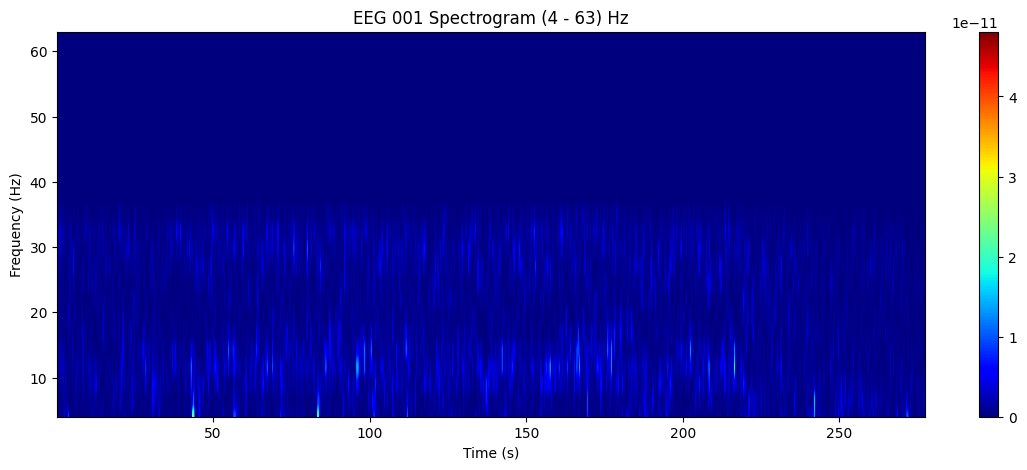

In [7]:
# extract a longer segment of data from a different channel
channel = 'EEG 001'
data, times = raw[channel, :]
data = data[0]
fs = raw.info['sfreq']

def plot_spectogram(data, fs, fmin, fmax, channel_name):
    # plot the spectrogram
    plt.figure(figsize=(14, 5))
    Sxx, freqs, bins, im = plt.specgram(
        data,
        Fs=fs,
        NFFT=64,
        cmap='jet',
        noverlap=0
    )
    Sxx = Sxx[fmin:fmax, :]
    plt.ylim(fmin, fmax)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(channel + f' Spectrogram {channel_name}({fmin} - {fmax}) Hz')
    plt.imshow(Sxx, aspect='auto',
               cmap='jet', origin='lower',
               extent=[bins[0], bins[-1], freqs[0], freqs[-1]],
               vmin=0, vmax=np.max(Sxx))
    plt.colorbar()
    plt.show()
    return Sxx

fft_spectogram = plot_spectogram(data, fs, 4, 63, '')

In [8]:
EEG_FOLDER = f'../datasets/EEG_spikes/sample_audvis_raw-filt/EEG 001'
def _name_to_f(filename):
    filename = filename[:-4]
    filename = ('0' * (6-len(filename))) + filename
    return filename

def spikes_to_bins(spikes, num_bins=60):
    bins = np.zeros(num_bins)
    window = len(spikes) // num_bins
    for j in range(num_bins):
        bins[j] = np.sum(spikes[j*window:(j+1)*window])
    return bins


full_spikes_data = {
    _name_to_f(f0): np.load(f'{EEG_FOLDER}/{clk_freq}/{f0}')['spikes'].astype(np.int8)
    for clk_freq in os.listdir(EEG_FOLDER)
    for f0 in os.listdir(f'{EEG_FOLDER}/{clk_freq}')
    if clk_freq != '16830'
}

def all_spikes2bins(full_spikes_data, bins=60):
    return {
        f0: spikes_to_bins(spikes, bins)
        for f0, spikes in full_spikes_data.items()
    }

In [9]:
def normalize_arr(arr):
    # return arr
    return (arr-min(arr))/(max(arr)-min(arr))


def spikes_data2eeg_bands(spikes_data):
    return {
        '1. Theta': sum(normalize_arr(spikes_data[f])#.astype(np.int32)
                             for f in ['04.604', '05.755', '06.791', '08.000']) / 4,
                             # for f in ['04.604', '05.180', '05.755', '06.791', '08.000'])/ 4,
        '2. Alpha': sum(normalize_arr(spikes_data[f])#.astype(np.int32)
                             # for f in ['08.058', '09.065', '10.072', '11.885', '14.000']) / 5,
                             # for f in ['08.058', '09.065', '10.072', '11.885', '14.000'])/6,
                             # for f in ['08.058', '09.065', '10.072', '11.885', '14.000']) / 5,
                             for f in ['08.058', '09.065', '10.072', '11.885', '14.000']) / 5,
        '3. Beta':  sum(normalize_arr(spikes_data[f])#.astype(np.int32)
                             for f in ['15.108', '17.266', '19.424', '21.583', '25.468']) / 5,
                             # for f in ['15.108', '17.266', '21.583', '25.468']) / 4,
                             # for f in ['15.108', '17.266', '19.424', '21.583', '25.468'])/ 16,
        '4. Gamma': sum(normalize_arr(spikes_data[f])#.astype(np.int32)
                             for f in ['36.259', '40.791', '45.324', '53.482', '63.000']) / 5
                             # for f in ['36.259', '40.791', '45.324', '53.482', '63.000'])/ 33
                             # for f in ['36.259', '40.791', '45.324', '63.000']) / 4
    }

eeg_bands = spikes_data2eeg_bands(all_spikes2bins(full_spikes_data, 16))
spikes_spectogram = spikes_dict2spectogram(eeg_bands)
plot_heatmap(spikes_spectogram, eeg_bands.keys(), annotate=True, title='Spikes spectogram')

KeyError: '04.604'

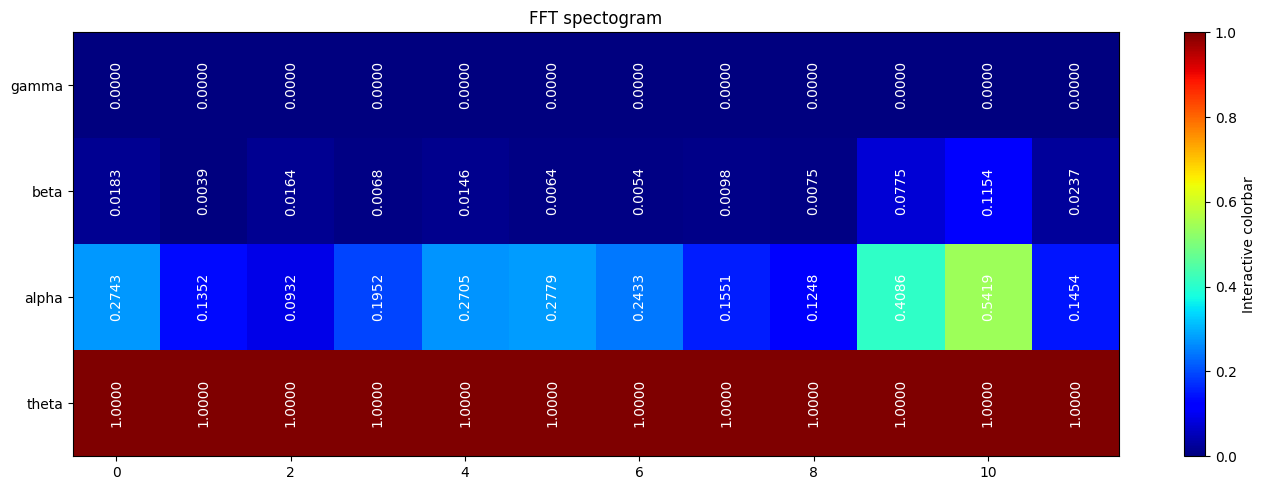

In [10]:
# extract a longer segment of data from a different channel
channel = 'EEG 001'
data, times = raw[channel, :]
data = data[0]
fs = raw.info['sfreq']

def fft_spectogram2bins(Sxx, bins):
    bin_sxx = np.zeros((4, bins))
    window = len(Sxx[0])//bins

    # dict to array
    for ch_i, (f_min, f_max) in enumerate(channels.values()):
        for i in range(bins):
            bin_sxx[ch_i][i] = np.sum(Sxx[f_min:f_max, i*window:(i+1)*window]) / (f_max - f_min)
        bin_sxx[ch_i][i] = np.sum(Sxx[f_min:f_max, i*window:]) / (f_max - f_min)

    bin_sxx = bin_sxx[:, len(bin_sxx[0])//4:]
    return normalize_columns(bin_sxx)


def plot_bins_spectogram(data, fs, channels, bins):
    # plot the spectrogram
    fig, ax = plt.subplots(figsize=(14, 5))
    Sxx, freqs, _, _ = ax.specgram(
        data,
        # NFFT=2048*4,
        Fs=fs,
        # noverlap=1024,
        cmap='jet',
    )
    Sxx = Sxx[:63, :]
    bin_sxx = np.zeros((4, bins))
    window = len(Sxx[0])//bins

    # dict to array
    for ch_i, (f_min, f_max) in enumerate(channels.values()):
        for i in range(bins):
            bin_sxx[ch_i][i] = np.sum(Sxx[f_min:f_max, i*window:(i+1)*window]) / (f_max - f_min)
        bin_sxx[ch_i][i] = np.sum(Sxx[f_min:f_max, i*window:]) / (f_max - f_min)

    bin_sxx = bin_sxx[:, len(bin_sxx[0])//4:]

    bin_sxx = normalize_columns(bin_sxx)

    # if not plot:
    #     return bin_sxx

    im = ax.imshow(
        bin_sxx,
        cmap='jet',
        aspect='auto',
        origin='lower',
        vmin=np.min(bin_sxx),
        vmax=np.max(bin_sxx),
        )
    ax.set_yticks(np.arange(len(channels)), labels=channels.keys())

    # Loop over data dimensions and create text annotations.
    for i, _ in enumerate(channels):
        for j, _ in enumerate(bin_sxx[i]):
            text = ax.text(j, i, f'{bin_sxx[i, j]:.4f}',
                           rotation=90,
                           ha="center", va="center", color="white")

    ax.set_title("FFT spectogram")
    fig.tight_layout()
    fig.colorbar(im, ax=ax, label='Interactive colorbar')
    plt.show()
    return bin_sxx


channels = {
    'theta': (4, 8),
    'alpha': (8, 14),
    'beta': (14, 32),
    'gamma': (32, 60),
}
fft_bin_spectogram = plot_bins_spectogram(data, fs, channels, 16)

In [11]:
experiment_time = len(data)/fs
for bins in [16, 32, 64, 128, 256, 512, 1024]:
    fft_bin_spectogram = fft_spectogram2bins(fft_spectogram, bins)

    eeg_bands = spikes_data2eeg_bands(all_spikes2bins(full_spikes_data, bins))
    spikes_spectogram = spikes_dict2spectogram(eeg_bands)
    fft_window = len(fft_bin_spectogram[0]) / len(fft_spectogram[0])
    spikes_window = len(full_spikes_data['08.000']) / len(spikes_spectogram[0])

    # Define two matrices
    matrix1 = fft_bin_spectogram
    matrix2 = spikes_spectogram

    # Flatten the matrices and calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(matrix1.flatten(), matrix2.flatten())[0, 1]

    print(f"bins={bins} | timeslot={270/bins:.3f}s | fft_window={fft_window:.3f}| spikes_window={spikes_window:.1f} | Corr={correlation_coefficient:.3f}")

KeyError: '04.604'

In [12]:

fft_bin_spectogram = fft_spectogram2bins(fft_spectogram, 16)

eeg_bands = spikes_data2eeg_bands(all_spikes2bins(full_spikes_data, 16))
spikes_spectogram = spikes_dict2spectogram(eeg_bands)

KeyError: '04.604'